# CNN- CIFER10 Classifier

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (10000, 1), (50000, 1))

## Visualizing the data

array([7])

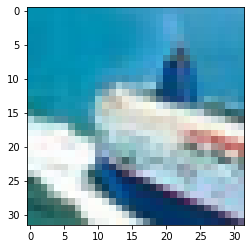

In [4]:
index=1822
plt.imshow(X_train[index])
y_test[index]


In [5]:
"""# Plotiing the data in a grid form so that we can see how the data looks

# Defining the grid
L_grid=10
W_grid=10

# Maplotlib sub plot creation

fig, axes = plt.subplots(L_grid, W_grid, figsize=(30,30))
axes=axes.ravel()

for i in range(0,L_grid*W_grid):
    ind=np.random.randint(len(X_train))
    axes[i].imshow(X_train[ind])
    axes[i].set_title(y_train[ind])
    axes[i].axis('off')
    
"""

"# Plotiing the data in a grid form so that we can see how the data looks\n\n# Defining the grid\nL_grid=10\nW_grid=10\n\n# Maplotlib sub plot creation\n\nfig, axes = plt.subplots(L_grid, W_grid, figsize=(30,30))\naxes=axes.ravel()\n\nfor i in range(0,L_grid*W_grid):\n    ind=np.random.randint(len(X_train))\n    axes[i].imshow(X_train[ind])\n    axes[i].set_title(y_train[ind])\n    axes[i].axis('off')\n    \n"

## Data Preprocessing

In [6]:
# Converting the X_train and X_test matric values to float32

X_train= X_train.astype('float32')
X_test=X_test.astype('float32')

In [7]:
# Sunce y_train and y_test are an integer values having class number 0-9. we convert it into categorical values
# Importing module for this purpose

import keras

y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test,10)


In [8]:
#Checking the value of y_train

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# Normalize the data
#Flatten the shape of the image( To enable this just divide by 255)

X_train=X_train/255
X_test=X_test/255

In [10]:
# Defining the input shape

input_shape=X_train.shape[1:]
print('the input shape is', input_shape)

the input shape is (32, 32, 3)


## Building the model

In [11]:
#importing liberaries to build the model

from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [12]:
#We start to build the layers one by one
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.3))

#Adding another 2 Cnn layers

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(rate=0.2))

#Adding a flatten layer

cnn_model.add(Flatten())

#Adding two Dense layers (Fully connected layer)

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

#creating the final output layer of the network

cnn_model.add(Dense(units=10,activation='softmax'))   # Units are equal to 10 as the output categories are 10


In [13]:
# Compiling the model

cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Running the model

history=cnn_model.fit(X_train,y_train,epochs=13,batch_size=32, shuffle=True)

Epoch 1/13
50000/50000 [==============================] - 37s 748us/step - loss: 1.5463 - accuracy: 0.4440
Epoch 2/13
50000/50000 [==============================] - 29s 572us/step - loss: 1.1326 - accuracy: 0.6038
Epoch 3/13
50000/50000 [==============================] - 29s 587us/step - loss: 1.0125 - accuracy: 0.6542
Epoch 4/13
50000/50000 [==============================] - 29s 578us/step - loss: 0.9680 - accuracy: 0.6718s - loss: 0.9675 - accura
Epoch 5/13
50000/50000 [==============================] - 28s 569us/step - loss: 0.9558 - accuracy: 0.6775
Epoch 6/13
50000/50000 [==============================] - 28s 568us/step - loss: 0.9265 - accuracy: 0.6894
Epoch 7/13
50000/50000 [==============================] - 28s 569us/step - loss: 0.9236 - accuracy: 0.6916
Epoch 8/13
50000/50000 [==============================] - 28s 569us/step - loss: 0.9174 - accuracy: 0.6964
Epoch 9/13
50000/50000 [==============================] - 28s 569us/step - loss: 0.9249 - accuracy: 0.6957
Epoch 10/13


## Evaluating the model

In [16]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

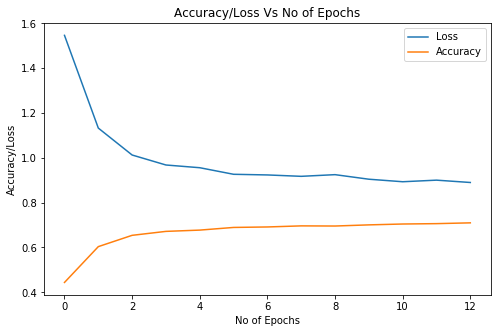

In [24]:
# Plotting the loss and accurcy

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Accuracy/Loss Vs No of Epochs')
plt.legend()
plt.show()

In [26]:
#Evaluating the model on the testset

evaluation=cnn_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 110us/step


In [34]:
print('The accuracy on the test set is: {} %'.format(evaluation[1]*100))

The accuracy on the test set is: 69.16000247001648 %


In [39]:
# Showing the accurcay pictorically

# Getting the pridicted classes
predicted_classes=cnn_model.predict_classes(X_test)
y_test=y_test.argmax(1)   #Since the classes as we defined earlier are different, y_test classes were changed to match predicted classes


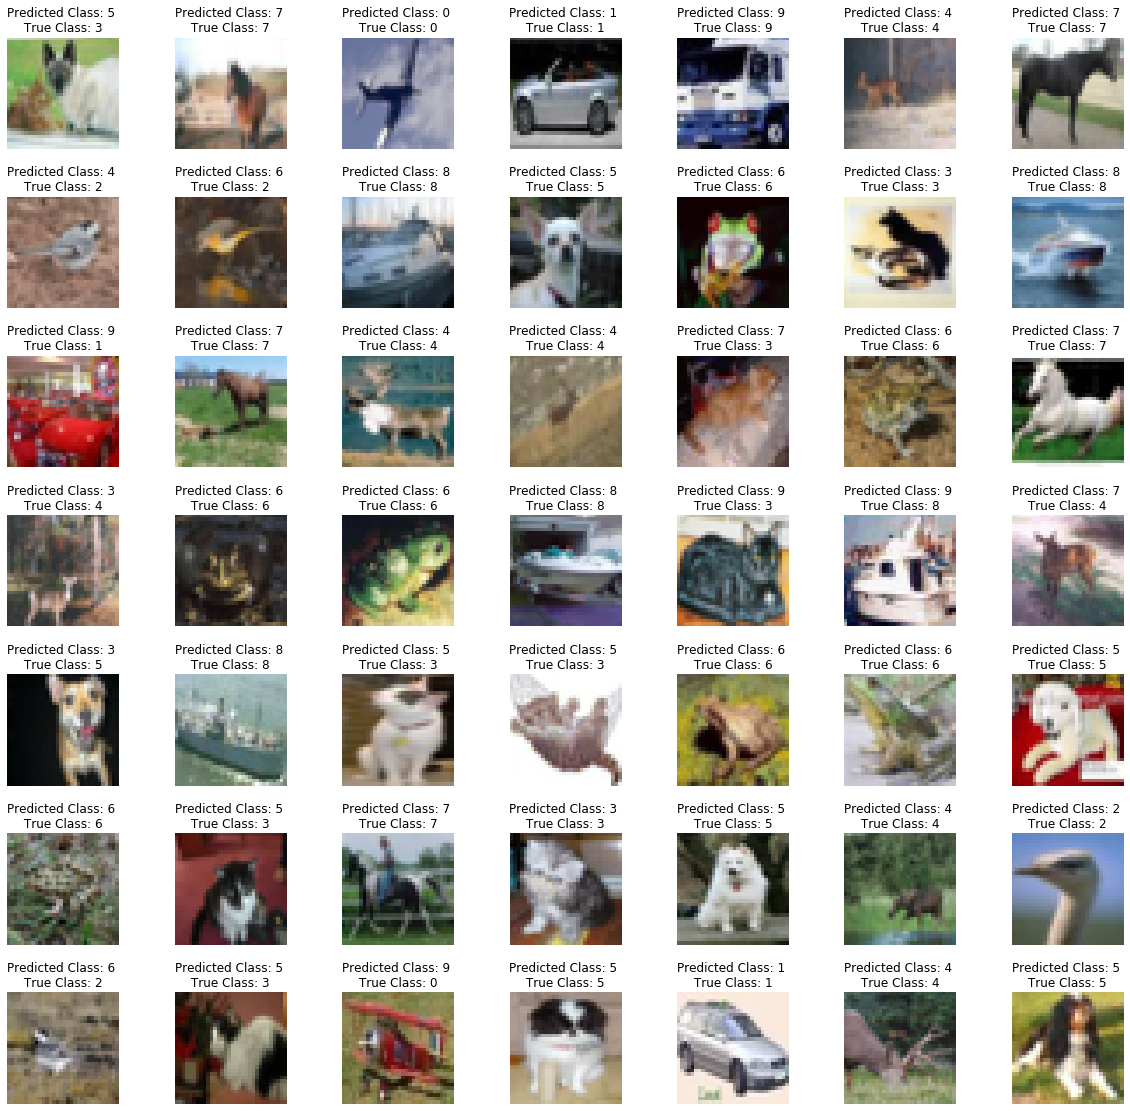

In [48]:
#Plotting the pictures (Qualitative verification)

l=7
w=7
fig,axes= plt.subplots(l,w,figsize=(20,20))
axes=axes.ravel()
for i in range(l*w):
    ind=np.random.randint(len(y_test))
    axes[i].imshow(X_test[ind])
    axes[i].set_title("Predicted Class: {} \n True Class: {} ".format(predicted_classes[ind],y_test[ind]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

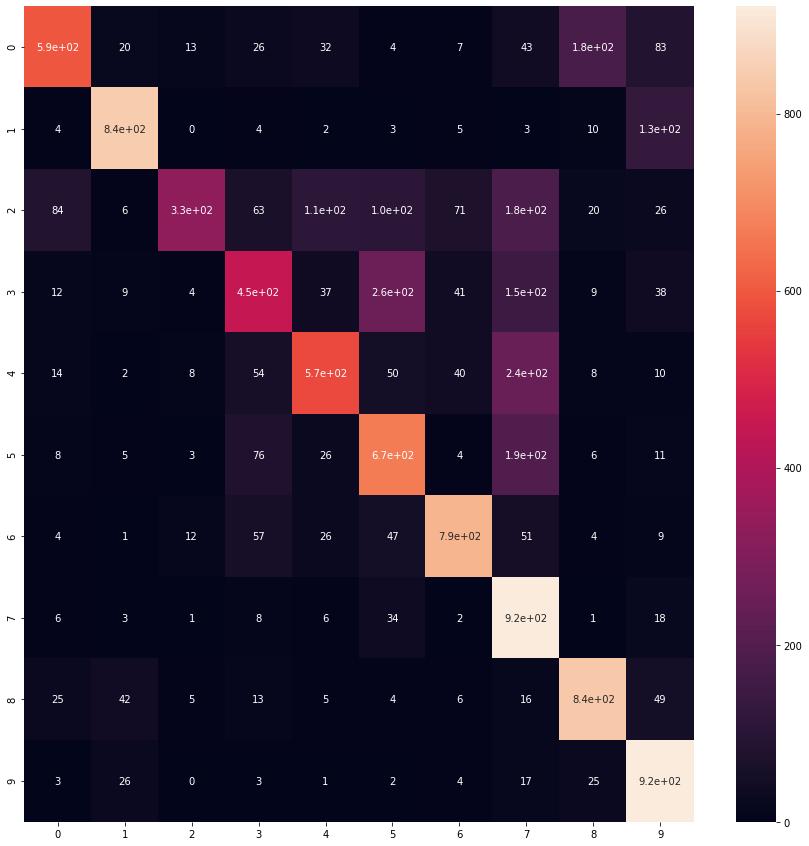

In [54]:
# Quantitative Verification
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True )    # Plotting the confusion matrix # As we can see we have a lots of false negative numbers

In [56]:
# Using classification report

print(classification_report(y_test,predicted_classes))



              precision    recall  f1-score   support

           0       0.79      0.59      0.68      1000
           1       0.88      0.84      0.86      1000
           2       0.88      0.33      0.48      1000
           3       0.60      0.45      0.51      1000
           4       0.70      0.57      0.63      1000
           5       0.57      0.67      0.61      1000
           6       0.81      0.79      0.80      1000
           7       0.51      0.92      0.65      1000
           8       0.76      0.83      0.80      1000
           9       0.71      0.92      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.68     10000
weighted avg       0.72      0.69      0.68     10000

